# Análisis de la posible evolución de pandemia Covid-19 con modelos SEIR

## Modelo SEIR (Susceptible-Expuestos-Infectados-Recuperados) 

### Adaptado por:
A. Cruz-Roa, 
[GI GITECX](http://gitecx.unillanos.edu.co/), 
[SI AdaLab](http://adalab.unillanos.edu.co/), 
Escuela de Ingeniería, 
[Facultad de Ciencias Básicas e Ingeniería](http://fcbi.unillanos.edu.co/fcbi/), 
[Universidad de los Llanos](https://www.unillanos.edu.co/)

Para muchos infecciones existe un significativo periodo de incubación, existen trabajos previos de otras
enfermedades infecciosas similares como otros coronavirus (MERS o SARS)[1,2]. 

El modelo SEIR consiste en asumir que el total de la población se puede dividir en cuatro grupos: suceptibles (S), expuestos (E), infectados (I) o recuperados (R).

<img src="SEIR.png">
Figura 1. Esquema del modelo SEIR donde dada una infección los individuos pasan de un grupo a otro, pasando de susceptibles a expuestos, luego de expuestos a infectados, y finalmente de infectados a recuperados.

### Modelo SEIR base ($M_1$)

Matemáticamente el modelo SEIR se representa por un sistema de ecuaciones diferenciales ordinarias (EDOs) como se presenta a continuación:

\begin{align}
\frac{dS} {dt} &= -\beta \frac{S}{N} I \\\\
\frac{dE}{dt}  &= +\beta \frac{S}{N} I -\sigma E \\\\
\frac{dI}{dt} &= +\sigma E - \gamma I \\\\
\frac{dR}{dt} &= (1-f) \gamma I
\end{align}

De esta forma este modelo asume que el total de la población ($N$) es la suma de los individuos clasificado en cada uno de los grupos suceptibles ($S$), expuestos ($E$), infectados ($I$) o recuperados ($R$), así: $S+E+I+R=N$ suponiendo que las tasas naturales de nacimientos y muertes es constante, pero realmente la población total $N$ es una variable.

Donde,

$S:$ Humanos susceptibles

$E: $ Humanos expuestos (latentes)

$I:$ Humanos infecciosos

$R: $ Humanos recuperados

$\beta: $ Probabilidad de transmisión de la enfermedad por contacto

$\sigma:$ Velocidad convertirse en contagioso una vez expuesto (expuesto -> infectado)

$\gamma:$ Tasa de recuperación per cápita, i.e. Velocidad de recuperación o fallecimiento (infectado -> [recuperado o fallecido])

$f:$ Fracción de gente que no supera la enfermedad

La disminución del número de personas sanas con el tiempo será proporcional a las personas infecciosas (I) y la cantidad (proporcional) de las mismas $S/N$. Además, se define un factor de probabilidad por día de infectar a otra persona denominado $\beta$. La variación del número de personas expuestas ($E$), seguirá la misma relación pero aumentando su número (con signo positivo). Lo cual queda expresado como:

\begin{align}
\frac{dS} {dt} &= -\beta \frac{S}{N} I \\\\
\frac{dE}{dt}  &= +\beta \frac{S}{N} I \\\\
\end{align}

Una vez que una persona está expuesta a otra infectada ($E$), es necesario un tiempo para mostrar los síntomas y llegar a ser infecciosa ($I$). Este tiempo depende de cada caso, pero para Covid-19 en promedio se estimó que se necesita alrededor de 7 días para ello. Vamos a modelar esto con una *tasa* de pasar de $E$ a $I$ de $\sigma = 1/7$ por día:

$$
\begin{align}
\frac{dE}{dt} = -\sigma E \\\\
\frac{dI}{dt} = +\sigma E 
\end{align}
$$

En este punto, la persona enferma puede recuperarse o fallecer. Una vez más, vamos a modelar esto con una *tasa*, que se puede encontrar con un $ \gamma =  1 / 5$ por día. La probabilidad de fallecer estimada por la OMS en estos momentos es del 4% ([Fuente: BBC](https://www.bbc.com/mundo/noticias-51708029)) ([Fuente: OMS](http://www.who.int/mediacentre/factsheets/fs103/en/)), es decir $f = 0.04$. Así, la fracción de personas sobreviven es de $1-f = 0.96$ (recuperados, personas que sobreviven). Fíjate, que el resto de la fración sería en número de personas fallecidas.

$$
\begin{align}
\frac{dI}{dt} &= - \gamma I \\\\ 
\frac{dR}{dt} &= (1-f) \gamma I
\end{align}
$$

Aún no se ha definido el valor de $\beta$, el cual indica la velocidad de personas que se infectan. Para ello haremos uso de un parámetro importante: el número medio de personas que un paciente con Covid-19 podría llegar a infectar $R_0$.

$$R_0 = \frac{\beta}{\gamma}$$

Para Covid-19 se han estimado rangos de $R_0$ entre $2$ y $2.5$ ([Fuente: Nature](https://www.nature.com/articles/d41586-020-00758-2)), o entre $2.5$ y $3.5$ ([Fuente: The Lancet](https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(20)30074-7/fulltext)).

La importancia de disminuir el factor $R_0$ esta relacionada con las medidas de salud pública. A mayores recortes y falta de capacidad de recursos en atención en salud, mayor será el número de contagios. De la misma forma mayor inversión de la capacidad y recursos del sistema de saludo o mayor número de medidas adoptadas para controlar el proceso de la pandemia resulta en un menor número de contagios y por tanto un menor valor del factor del $R_0$.

## El número reproductivo básico ($R_0$)

El número reproductivo básico, $R_0$, es el número de infecciones secundarias que una persona infectada produciría en una población totalmente susceptible durante todo el período infeccioso.

$R_0$ proporciona una condición umbral para la estabilidad del punto de equilibrio libre de enfermedad (para la mayoría de los modelos):

* El punto de equilibrio libre de enfermedad es localmente asintóticamente estable cuando $R_0 < 1$: la enfermedad se extingue.

* El punto de equilibrio libre de enfermedad es inestable cuando $R_0 > 1$: la enfermedad se establece en la población o se produce una epidemia.

* Para un modelo dado, $R_0$ se fija en todo momento

Esta definición solo es válida para modelos autónomos homogéneos simples.

Puede definir condiciones de umbral similares para modelos más complicados que incluyen heterogeneidad y/o estacionalidad, pero la definición básica ya no es válida.

<img src="R0.png">

<img src="R0_difusion.png">

Fuente: https://www.cameroonweb.com/CameroonHomePage/NewsArchive/Ebola-How-does-it-compare-316932

## Implementación y simulación del modelo SEIR para Covid-19 

Se adaptó la implementación del Ejercicio de EDOs (modelo epidemiológico SEIR del virus del Ébola) de la [Charla - Taller sobre Python científico en la PyConES 2014 por CAChemE y Pybonacci](https://nbviewer.jupyter.org/github/Python-en-ciencia/Python-cientifico/blob/master/PythonCientifico-201411-PyConEs-CachemePybonacci/03-Scipy-ejercicio-ODEs-ebola.ipynb).

Adicionalmente, pra este modelamiento y simulación se parte de los siguientes supuestos:

- Se asume que las tasas naturales de nacimientos y muertes se mantienen iguales.
- Se asumen los casos importados al día 18 de marzo de 2020 como parte del grupo de infectados ($I=102$).

Incluimos las librerias y dependencias necesarias para la implementación

In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd
import datetime

Lo siguiente que debemos hacer es definir nuestro sistema de ec. diferenciales:

Se incluye la definición del sistema de ecuaciones diferenciales con la definición de los parámetros $\sigma$, $\gamma$ y $f$ con un $R_0$ 

In [13]:
def DiffEqs(y, t):
    """ Modelo simple epidemiológico para la propagacion del virus de SARS-CoV-2 """
    
    # Recuperamos las variables dependientes de entrada
    S, E, I, R, D = y
    
    Nn = S + E + I + R # Total de personas vivas
    
    #--------------------------
    # Parámetros del modelo
    #---------------------------

    sigma = 1/7 # 1/7 Velocidad/Tasa convertirse en contagioso una vez expuesto (expuesto -> infectado)  
    gamma = 1/5 # 1/5 Velocidad/Tasa de recuperación o fallecimiento (infectado -> [recuperado o fallecido])
    #https://institucional.us.es/blogimus/2020/03/covid-19-analisis-por-medio-de-un-modelo-seir/
    
    f = 0.14 # 1/7 Fracción de gente que no supera la enfermedad 

    # Nº de personas contagiadas por infectado
    R_0 = 2.68 #2.68 # https://institucional.us.es/blogimus/2020/03/covid-19-analisis-por-medio-de-un-modelo-seir/

    beta = R_0*gamma # Velocidad con la que se propaga la infección

    # Definimos las ecuaciones diferenciales
    dSdt = -beta*(S/Nn)*I
    dEdt = +beta*(S/Nn)*I - sigma*E
    dIdt = sigma*E - gamma*I
    dRdt = (1.0 - f)*gamma*I
    dDdt = f*gamma*I
    
    return [dSdt, dEdt, dIdt, dRdt, dDdt]

Una vez hecho esto, podemos resolver el sistema:

In [14]:
tiempo_simulacion = 365 # días
t  = np.linspace(0., tiempo_simulacion, tiempo_simulacion)#1000

# Condiciones iniciales

N = 49648685
# Población total Colombia = 49648685, Orinoquia = , Meta = 1016672, Villavicencio = 551212

y0 = [N, 2000, 102, 1, 1] # [S, E, I, R, D]

# Llamamos al ode para resolver las eq. diferenciales   

solution = integrate.odeint(DiffEqs, y0, t)

S = solution[:,0] #  S es el nº de personas sin infectar
E = solution[:,1] #  E es el nº de portadores del virus no contagiosos (aún)
I = solution[:,2] #  I es el nº de personas sintomáticas e infecciosas
R = solution[:,3] #  R es el nº de personas recuperadas
Ds = solution[:,4] #  D es el nº de personas fallecidas

Ya podemos representar los resultados obtenidos

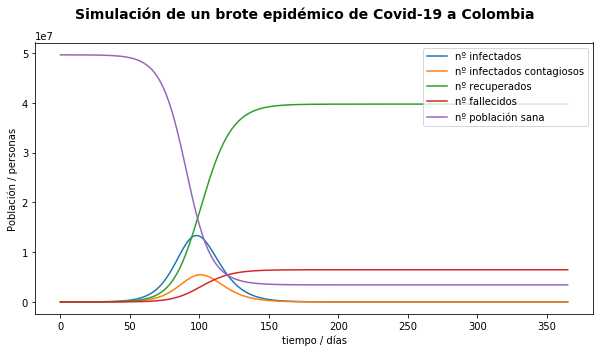

In [15]:
# Creamos la figura para representar los resultados

fig = plt.figure(figsize=(10, 5))

# Representamos las curvas de evolución con respecto al tiempo
SI = (E + I)
plt.plot(t, (E + I))
plt.plot(t, I)
plt.plot(t, R)
plt.plot(t, Ds)
plt.plot(t, S)

# Añadimos leyenda a los datos
plt.legend(["nº infectados",
        "nº infectados contagiosos", 
        "nº recuperados", 
        "nº fallecidos",
        u"nº población sana "], loc=1)

plt.suptitle(u'Simulación de un brote epidémico de Covid-19 a Colombia',
             fontsize=14,
             fontweight='bold')

plt.xlabel(u"tiempo / días")
plt.ylabel(u"Población / personas")

plt.show()

fig.savefig('SEIR__M1_colombia_covid19.png', dpi=300)

In [16]:
diasAdicionales = 0
numDias = 14+diasAdicionales # estimación a 31 de marzo de 2020 y hasta 30 de abril de 2020

fecha_base = pd.to_datetime('18/03/2020', format='%d/%m/%Y') #datetime.datetime.today()
lista_fechas = [fecha_base + datetime.timedelta(days=x) for x in range(numDias)]

fechas = ["" for x in range(len(lista_fechas))]
for i in range(0,len(lista_fechas)):
    fechas[i] = lista_fechas[i].strftime("%m-%d-%Y")

In [18]:
idDia=90
print(S[idDia])
print(SI[idDia])
print(I[idDia])
print(R[idDia])
print(Ds[idDia])

26819973.133869927
11603346.666666407
4253908.424399741
9655622.79153871
1571846.4079249064


In [19]:
df = pd.read_excel('covid19-casos.xlsx', sheet_name='Sheet1')
df.fillna(0)

numDiasCasos = np.zeros(len(lista_fechas))

for i in df.index:
    for j in range(0,len(lista_fechas)):
        #print(df['Fecha'][i]+'--'+lista_fechas[j].strftime("%Y-%m-%d"))
        if df['Fecha'][i] == lista_fechas[j].strftime("%d/%m/%Y"):
            numDiasCasos[j] = numDiasCasos[j] + 1
            #print(df['Fecha'][i])
print(numDiasCasos)
numDiasCasos[0]=numDiasCasos[0]+75
for j in range(1,len(lista_fechas)):
    if numDiasCasos[j]!=0:
        numDiasCasos[j]=numDiasCasos[j-1]+numDiasCasos[j]

print(numDiasCasos)

[27. 26. 47. 35.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[102. 128. 175. 210.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]


In [30]:
numDiasMuertos=[1,1,1,1,2,3,3,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]#,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
numDiasCasos=[102,128,175,210,240,306,378,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]#,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

Infectados Estimados: [ 102.          331.15244765  507.21618241  652.85525238  782.89242328
  907.19820114 1032.53627628 1163.7446826  1304.49435252 1457.77910664
 1626.23531529 1812.35387824 2018.62454005 2247.63814192]
Infectados Reales: [102, 128, 175, 210, 240, 306, 378, nan, nan, nan, nan, nan, nan, nan]


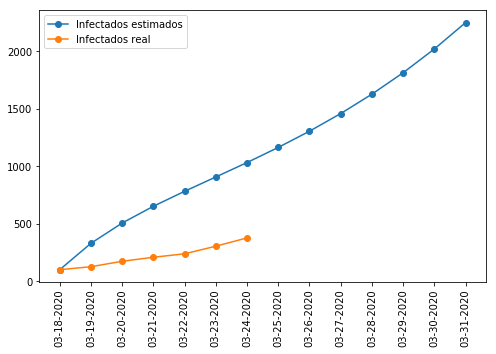

In [31]:
Fechas_SIER_df = pd.DataFrame({'fechas':fechas, 'infectados':numDiasCasos,'muertos':numDiasMuertos,'infectadosEst':I[0:numDias], 'muertosEst':Ds[0:numDias]})

Fechas_SIER_df['fechas'] = pd.to_datetime(Fechas_SIER_df['fechas'], format='%m-%d-%Y')

fig, ax = plt.subplots(1,1, figsize = (8,5))

xtick_locs = mpl.dates.date2num(Fechas_SIER_df['fechas'].tolist())
xtick_labels = fechas #uFechas.astype(str).tolist()
ax.plot(Fechas_SIER_df['fechas'], Fechas_SIER_df['infectadosEst'],marker='o', linestyle='-', label='Infectados estimados')
ax.plot(Fechas_SIER_df['fechas'], Fechas_SIER_df['infectados'] ,marker='o', linestyle='-', label='Infectados real')
ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels)
ax.tick_params(axis='x', rotation=90)
ax.legend();
print('Infectados Estimados: '+str(I[0:numDias]))
print('Infectados Reales: '+str(numDiasCasos))
fig.savefig('SEIR_M1_inf_infectReal_infectEst_colombia_covid19.png', dpi=300)


Muertos Estimados: [  1.           7.23944403  19.10239379  35.43922708  55.61821694
  79.34895336 106.57113208 137.38513144 172.00937366 210.75492987
 254.01130959 302.23959798 355.97052103 415.80592441]
Muertos Reales: [1, 1, 1, 1, 2, 3, 3, nan, nan, nan, nan, nan, nan, nan]


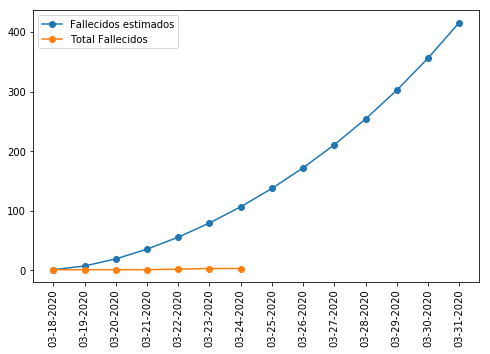

In [32]:
fig, ax = plt.subplots(1,1, figsize = (8,5))

xtick_locs = mpl.dates.date2num(Fechas_SIER_df['fechas'].tolist())
xtick_labels = fechas #uFechas.astype(str).tolist()
ax.plot(Fechas_SIER_df['fechas'], Fechas_SIER_df['muertosEst'],marker='o', linestyle='-', label='Fallecidos estimados')
ax.plot(Fechas_SIER_df['fechas'], Fechas_SIER_df['muertos'],marker='o', linestyle='-', label='Total Fallecidos')
ax.set_xticks(xtick_locs)
ax.set_xticklabels(xtick_labels)
ax.tick_params(axis='x', rotation=90)
ax.legend();
print('Muertos Estimados: '+str(Ds[0:numDias]))
print('Muertos Reales: '+str(numDiasMuertos))
fig.savefig('SEIR_M1_inf_muertosReal_muertosEst_colombia_covid19.png', dpi=300)


## Descargo de responsabilidad

De la misma forma que los autores originales de la implementación del código, mi formación no es del área médica, epidemiológica, física, matemática, y los resultados presentados son un ejercicio académico de las aplicaciones del modelamiento matemático, análisis numérico en el contexto de computación científica y análisis colectivo y participativo en el marco de la pandemia mundial de la enfermedad Covid-19 causada por el virus SARS-CoV-2 en Colombia, la Orinoquia, el Meta y Villavicencio. Cualquier observación, comentario, sugerencia y corrección con el fin de mejorar y ajustar el modelo es bienvenida. Gracias

## Referencias

[1] Yunhwan Kim, Sunmi Lee, Chaeshin Chu, Seoyun Choe, Saeme Hong, Youngseo Shin. The Characteristics of Middle Eastern Respiratory Syndrome Coronavirus Transmission Dynamics in South Korea. Osong Public Health and Research Perspectives. Volume 7, Issue 1, February 2016, Pages 49-55

[2] Chris Dye, Nigel Gay. Modeling the SARS Epidemic. Science. 20 Jun 2003 : 1884-1885

[3] Resultados y proyecciones (2005-2020) del censo 2005». DANE. Consultado el 1 de julio de 2015.

[4] Censo General 2005 - Proyecciones nacionales y departamentales de población 2005-2020». Departamento Administrativo Nacional de Estadística. marzo de 2010. Archivado desde el original el 23 de noviembre de 2007. Consultado el 21 de junio de 2016.

[5] Nakul Chitnis. Introduction to SEIR Models. Workshop on Mathematical Models of Climate Variability, Environmental Change and Infectious Diseases. Trieste, Italy. 8 May 2017. http://indico.ictp.it/event/7960/session/3/contribution/19/material/slides/0.pdf
